In [43]:
import torch
from gsplat import rasterization

In [44]:
# for matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# Initialize the Gaussian
mean = torch.tensor([[0., 0., 0.01]], device="cuda")
quat = torch.tensor([[1., 0., 0., 0.]], device="cuda")
color = torch.rand((1, 3), device="cuda")
opac = torch.ones((1,), device="cuda")
scale = torch.rand((1, 3), device="cuda")
view = torch.eye(4, device="cuda")[None]
K = torch.tensor([[[0.5, 0., 120.], [0., 0.5, 120.], [0., 0., 1.]]], device="cuda") # カメラの内部パラメータ

In [50]:
# rendering the Gaussian
rgb_image, alpha, metadata = rasterization(
    mean, 
    quat, 
    scale, 
    opac,
    color,
    view,
    K,
    240,
    240
)

In [47]:
# convert tensor (size: 1, 240, 240, 3) to numpy array (size: 240, 240, 3)
np_image = rgb_image[0].cpu().numpy()

(-0.5, 239.5, 239.5, -0.5)

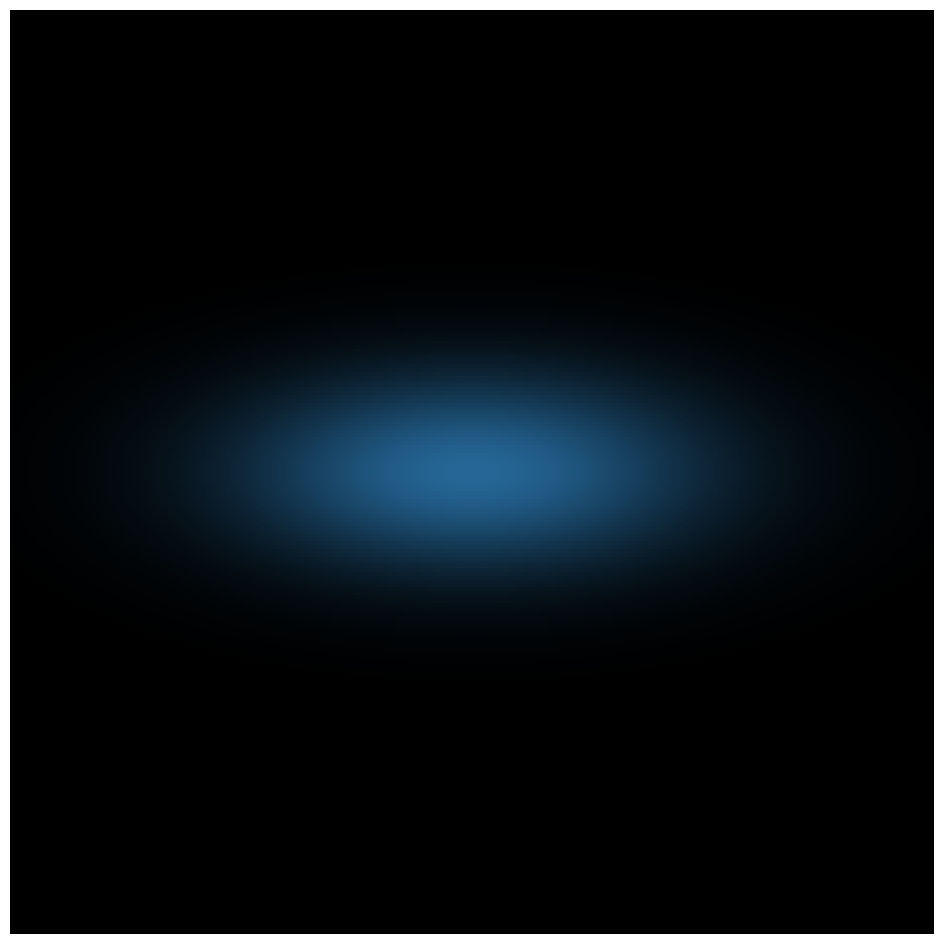

In [49]:
# show the image
plt.imshow(np_image)
plt.axis('off')